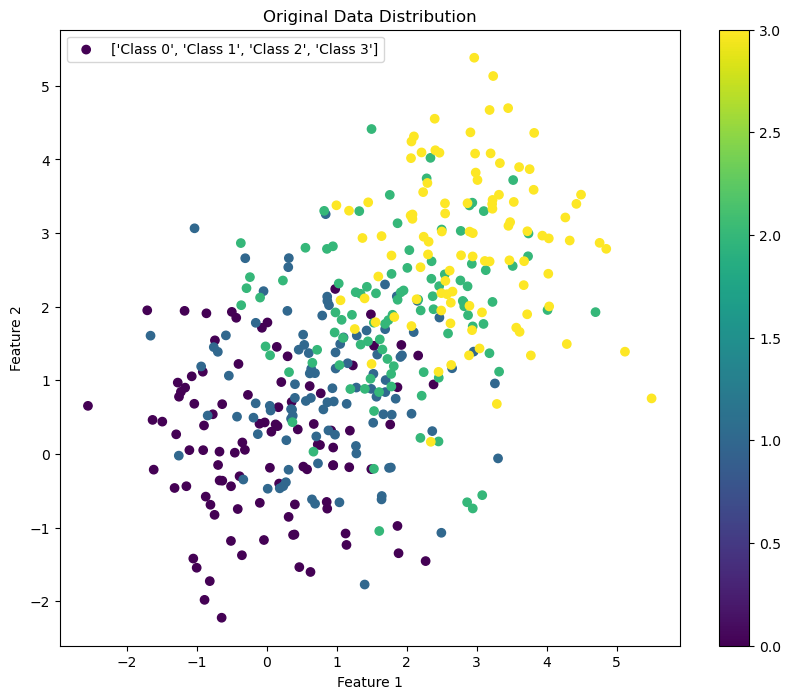

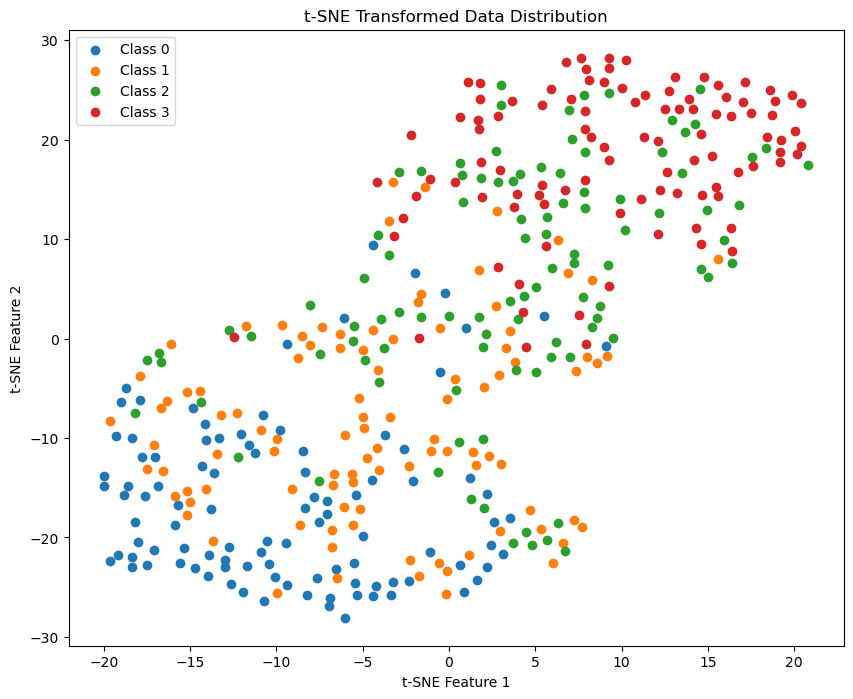

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# 设置随机种子以获得可重复的结果
np.random.seed(0)

# 定义生成数据的函数
def generate_data(group_size, mean_offset):
    return np.random.multivariate_normal(mean=[mean_offset, mean_offset], cov=np.eye(2), size=group_size)

# 生成四组数据
normal_data = generate_data(100, 0)
mild_fault_data = generate_data(100, 1)
moderate_fault_data = generate_data(100, 2)
severe_anomaly_data = generate_data(100, 3)

# 合并所有数据
X = np.vstack((normal_data, mild_fault_data, moderate_fault_data, severe_anomaly_data))

# 为t-SNE提供标签
y = np.repeat([0, 1, 2, 3], [100, 100, 100, 100])

# 使用PCA进行初步降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 使用t-SNE降维
tsne = TSNE(n_components=2, learning_rate=1000, n_iter=1000, perplexity=30.0, random_state=0, init='random')
X_tsne = tsne.fit_transform(X_pca)

#分类前数据分布
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label=[f'Class {i}' for i in range(4)])
plt.colorbar(scatter)
plt.title('Original Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# 绘制分类后的数据分布
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=f'Class {i}')
plt.title('t-SNE Transformed Data Distribution')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()